In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
     

In [2]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)

True

Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).
Convert text to lowercase and remove punctuation using re.
    
Tokenize the text into words and sentences.

Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.

Remove stopwords (using NLTK's stopwords list).

Display word frequency distribution (excluding stopwords).

--- Q1 ---
Tokens (NLTK word_tokenize): ['artificial', 'intelligence', 'ai', 'is', 'revolutionizing', 'the', 'modern', 'world', 'by', 'simulating', 'human', 'intelligence', 'through', 'machines', 'it', 'encompasses', 'a', 'wide', 'range', 'of', 'technologies', 'including', 'machine', 'learning', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'robotics', 'from', 'personal', 'assistants', 'like', 'siri', 'and', 'alexa', 'to', 'advanced', 'systems', 'in', 'healthcare', 'finance', 'and', 'transportation', 'ai', 'is', 'becoming', 'an', 'integral', 'part', 'of', 'our', 'daily', 'lives', 'in', 'healthcare', 'ai', 'algorithms', 'assist', 'in', 'early', 'disease', 'detection', 'and', 'personalized', 'treatment', 'plans', 'in', 'finance', 'they', 'analyze', 'vast', 'amounts', 'of', 'data', 'to', 'detect', 'fraud', 'and', 'optimize', 'trading', 'strategies', 'selfdriving', 'cars', 'smart', 'homes', 'and', 'recommendation', 'systems', 'are', 'all', 'powered', 'by', 'ai', 'making

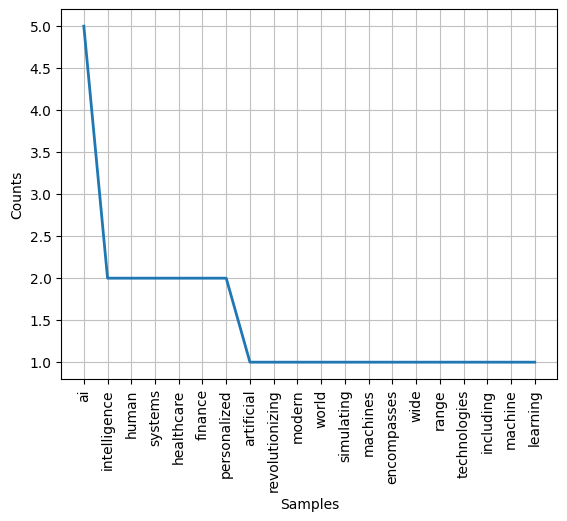

In [3]:
print("--- Q1 ---")
paragraph_q1 = "Artificial Intelligence (AI) is revolutionizing the modern world by simulating human intelligence through machines. It encompasses a wide range of technologies, including machine learning, natural language processing, computer vision, and robotics. From personal assistants like Siri and Alexa to advanced systems in healthcare, finance, and transportation, AI is becoming an integral part of our daily lives. In healthcare, AI algorithms assist in early disease detection and personalized treatment plans. In finance, they analyze vast amounts of data to detect fraud and optimize trading strategies. Self-driving cars, smart homes, and recommendation systems are all powered by AI, making everyday tasks more efficient and personalized. As AI continues to evolve, it holds the potential to solve complex global challenges, from climate change modeling to advancing scientific research. However, ethical concerns around bias, privacy, and job displacement must be addressed to ensure AI’s benefits are inclusive and aligned with human values."

text_lower = paragraph_q1.lower()
text_no_punct = re.sub(r'[^\w\s]', '', text_lower)

words_nltk = word_tokenize(text_no_punct)
sentences_nltk = sent_tokenize(paragraph_q1)

words_split = text_no_punct.split()

print("Tokens (NLTK word_tokenize):", words_nltk)
print("Tokens (Python split):", words_split)
print("Sentences (NLTK sent_tokenize):", sentences_nltk)

stop_words = set(stopwords.words('english'))
filtered_words_q1 = [word for word in words_nltk if word not in stop_words]

fdist = FreqDist(filtered_words_q1)
print("Word Frequency Distribution (excluding stopwords):")
fdist.plot(20, cumulative=False)
plt.show()
     

Q2. Using the same paragraph from Q1:

Extract all words with only alphabets using re.findall()

Remove stop words using NLTK’s stopword list

Perform stemming with PorterStemmer

Perform lemmatization with WordNetLemmaƟzer

Compare the stemmed and lemmatized outputs and explain when you’d prefer one over the other.

In [4]:
print("\n--- Q2 ---")
paragraph_q2 = paragraph_q1

words_alpha_only = re.findall(r'\b[a-zA-Z]+\b', paragraph_q2.lower())

filtered_words_q2 = [word for word in words_alpha_only if word not in stop_words]

porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words_q2]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words_q2]

print("Original words (alpha only, no stopwords):", filtered_words_q2)
print("Stemmed words:", stemmed_words)
print("Lemmatized words:", lemmatized_words)


--- Q2 ---
Original words (alpha only, no stopwords): ['artificial', 'intelligence', 'ai', 'revolutionizing', 'modern', 'world', 'simulating', 'human', 'intelligence', 'machines', 'encompasses', 'wide', 'range', 'technologies', 'including', 'machine', 'learning', 'natural', 'language', 'processing', 'computer', 'vision', 'robotics', 'personal', 'assistants', 'like', 'siri', 'alexa', 'advanced', 'systems', 'healthcare', 'finance', 'transportation', 'ai', 'becoming', 'integral', 'part', 'daily', 'lives', 'healthcare', 'ai', 'algorithms', 'assist', 'early', 'disease', 'detection', 'personalized', 'treatment', 'plans', 'finance', 'analyze', 'vast', 'amounts', 'data', 'detect', 'fraud', 'optimize', 'trading', 'strategies', 'self', 'driving', 'cars', 'smart', 'homes', 'recommendation', 'systems', 'powered', 'ai', 'making', 'everyday', 'tasks', 'efficient', 'personalized', 'ai', 'continues', 'evolve', 'holds', 'potential', 'solve', 'complex', 'global', 'challenges', 'climate', 'change', 'mod

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).

Use CountVectorizer to generate the Bag of Words representaƟon.
    
Use TfidfVectorizer to compute TF-IDF scores.
    
Print and interpret the top 3 keywords from each text using TF-IDF.

In [5]:
print("\n--- Q3 ---")
corpus_q3 = [
    "Machine learning models are transforming industries and reshaping businesses.",
    "Artificial intelligence is expected to revolutionize healthcare with new breakthroughs.",
    "The tech startup sector continues to grow, attracting talent and investors."
]

vectorizer_count = CountVectorizer()
bow_representation = vectorizer_count.fit_transform(corpus_q3)
print("Bag of Words Representation (matrix):")
print(bow_representation.toarray())
print("Feature Names (Vocabulary):", vectorizer_count.get_feature_names_out())

vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(corpus_q3)
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()
print("\nTF-IDF Representation (matrix):")
print(tfidf_matrix.toarray())

print("\nTop 3 Keywords per Text (TF-IDF):")
for i, doc in enumerate(corpus_q3):
    feature_index = tfidf_matrix[i, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
    sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
    top_keywords = [(feature_names_tfidf[i], score) for i, score in sorted_tfidf_scores[:3]]
    print(f"Text {i+1}: {top_keywords}")



--- Q3 ---
Bag of Words Representation (matrix):
[[1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0]]
Feature Names (Vocabulary): ['and' 'are' 'artificial' 'attracting' 'breakthroughs' 'businesses'
 'continues' 'expected' 'grow' 'healthcare' 'industries' 'intelligence'
 'investors' 'is' 'learning' 'machine' 'models' 'new' 'reshaping'
 'revolutionize' 'sector' 'startup' 'talent' 'tech' 'the' 'to'
 'transforming' 'with']

TF-IDF Representation (matrix):
[[0.25966344 0.34142622 0.         0.         0.         0.34142622
  0.         0.         0.         0.         0.34142622 0.
  0.         0.         0.34142622 0.34142622 0.34142622 0.
  0.34142622 0.         0.         0.         0.         0.
  0.         0.         0.34142622 0.        ]
 [0.         0.         0.32311233 0.         0.32311233 0.
  0.         0.32311233 0.         0.32311233 0.         0.3231

Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

1.Preprocess and tokenize both texts.

2.Calculate:

a. Jaccard Similarity using sets

b. Cosine Similarity using TfidfVectorizer + cosine_similarity()

c. Analyze which similarity metric gives beƩer insights in your case.

In [6]:
print("\n--- Q4 ---")

tech_text1 = "Machine learning, a subset of artificial intelligence, enables computers to learn from data and improve over time without being explicitly programmed. It drives applications like spam filtering, image recognition, and autonomous vehicles."
tech_text2 = "Cloud computing provides on-demand access to computing resources over the internet. It allows businesses to scale quickly, reduce infrastructure costs, and improve collaboration through services like data storage, networking, and software deployment."

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return set(filtered_tokens)

tokens1 = preprocess(tech_text1)
tokens2 = preprocess(tech_text2)

intersection = len(tokens1.intersection(tokens2))
union = len(tokens1.union(tokens2))
jaccard_sim = intersection / union if union != 0 else 0
print(f"Jaccard Similarity: {jaccard_sim:.4f}")

corpus_q4 = [tech_text1, tech_text2]
vectorizer_q4 = TfidfVectorizer(stop_words='english')
tfidf_matrix_q4 = vectorizer_q4.fit_transform(corpus_q4)
cosine_sim = cosine_similarity(tfidf_matrix_q4[0:1], tfidf_matrix_q4[1:2])[0][0]
print(f"Cosine Similarity: {cosine_sim:.4f}")



--- Q4 ---
Jaccard Similarity: 0.0698
Cosine Similarity: 0.0677


Q5. Write a short review for a product or service.
    
Use TextBlob or VADER to find polarity & subjectivity for each review.
    
Classify reviews into Positive / Negative / Neutral.
    
Create a word cloud using the wordcloud library for all positive reviews.


--- Q5 ---
Sentiment Analysis (Using TextBlob):

Review 1: This wireless headphone is amazing! Crystal-clear sound, long battery life, and super comfortable to wear. Totally worth the price.
  ➤ Polarity: 0.36
  ➤ Subjectivity: 0.54
  ➤ Sentiment Classification: Positive

Review 2: The mobile app works fine for basic tasks. It's not the fastest or most user-friendly, but it gets the job done without major issues.
  ➤ Polarity: 0.24
  ➤ Subjectivity: 0.41
  ➤ Sentiment Classification: Positive

Review 3: Extremely disappointed with this smartwatch. It stopped working within a week and customer service was unresponsive. Would not recommend.
  ➤ Polarity: -0.75
  ➤ Subjectivity: 0.75
  ➤ Sentiment Classification: Negative

Generating Word Cloud for Positive Reviews...


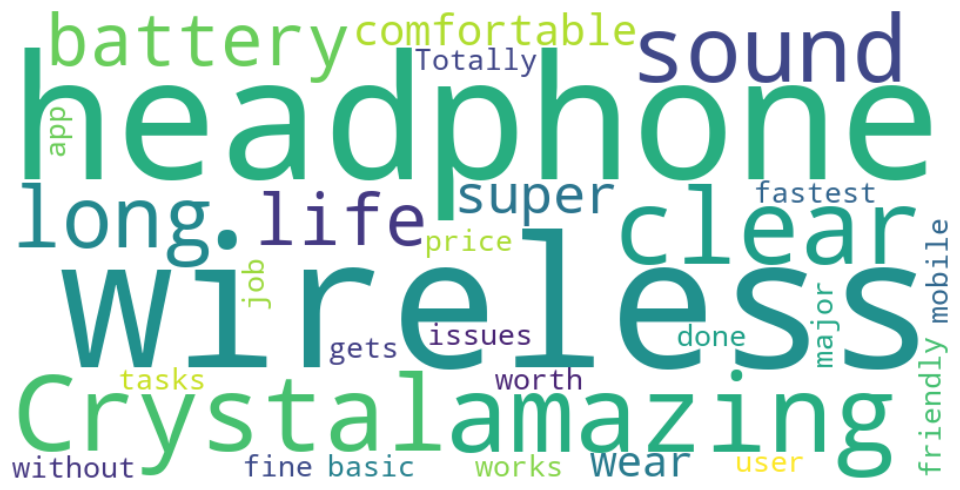

In [7]:
print("\n--- Q5 ---")

review1 = "This wireless headphone is amazing! Crystal-clear sound, long battery life, and super comfortable to wear. Totally worth the price."
review2 = "The mobile app works fine for basic tasks. It's not the fastest or most user-friendly, but it gets the job done without major issues."
review3 = "Extremely disappointed with this smartwatch. It stopped working within a week and customer service was unresponsive. Would not recommend."

reviews = [review1, review2, review3]

positive_reviews_text = ""
print("Sentiment Analysis (Using TextBlob):")

for i, review in enumerate(reviews):
    blob = TextBlob(review)
    polarity = round(blob.sentiment.polarity, 2)
    subjectivity = round(blob.sentiment.subjectivity, 2)

    if polarity > 0.2:
        sentiment_label = "Positive"
        positive_reviews_text += review + " "
    elif polarity < -0.2:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    print(f"\nReview {i+1}: {review}")
    print(f"  ➤ Polarity: {polarity}")
    print(f"  ➤ Subjectivity: {subjectivity}")
    print(f"  ➤ Sentiment Classification: {sentiment_label}")

if positive_reviews_text.strip():
    print("\nGenerating Word Cloud for Positive Reviews...")
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(positive_reviews_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo positive reviews found. Word cloud not generated.")

Q6. Choose your own paragraph (~100 words) as training data.

Tokenize text using Tokenizer() from keras.preprocessing.text

Create input sequences and build a simple LSTM or Dense model

Train the model and generate 2–3 new lines of text starƟng from any seed word you provide.

In [10]:
print("\n--- Q6 ---")
training_data = """Cognitive computing represents a transformative approach to computing that mimics human thought processes to solve complex problems. Unlike traditional computing, which relies on rigid algorithms and structured data, cognitive systems leverage artificial intelligence (AI), machine learning, and natural language processing to analyze vast amounts of unstructured data, such as text, images, and speech. These systems learn, adapt, and improve over time, enabling them to provide insights, make predictions, and interact with users in a more intuitive and human-like manner.
At the core of cognitive computing is its ability to understand context, reason through ambiguity, and generate hypotheses. For example, in healthcare, cognitive systems can analyze medical records, research papers, and patient symptoms to assist doctors in diagnosing diseases or recommending personalized treatments. In finance, they can detect patterns in market data to predict trends or identify fraud. By processing data at scale and recognizing subtle correlations, cognitive computing empowers industries to make data-driven decisions with unprecedented accuracy.
Cognitive computing also enhances human-computer interaction. Virtual assistants, powered by cognitive technologies, can engage in natural conversations, answer complex queries, and anticipate user needs. These systems are not programmed with predefined responses but instead learn from interactions, making them more effective over time. However, challenges remain, including ethical concerns around bias, data privacy, and the need for transparency in decision-making processes.
With applications spanning healthcare, finance, education, and customer service, cognitive computing is reshaping how organizations operate and innovate. As the technology evolves, it promises to bridge the gap between human intelligence and machine efficiency, unlocking new possibilities for solving global challenges. With its potential to augment human capabilities, cognitive computing is poised to redefine the future of work and decision-making in an increasingly complex world."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([training_data])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in training_data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line.strip()])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.eye(total_words)[y]

model = Sequential([
    Embedding(total_words, 64, input_length=max_seq_len - 1),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Training simple LSTM model...\n")
model.fit(X, y, epochs=120, verbose=0)
print("\nModel training complete.")

seed_text = "human"
next_words = 20

print(f"\nGenerating text from seed: '{seed_text}'\n")
generated_text = seed_text

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([generated_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)[0]
    predicted_index = np.argmax(predicted_probs)

    output_word = tokenizer.index_word.get(predicted_index, "")
    if not output_word:
        break
    generated_text += " " + output_word

print("Generated Text:\n", generated_text)


--- Q6 ---
Training simple LSTM model...


Model training complete.

Generating text from seed: 'human'

Generated Text:
 human applications spanning healthcare finance education and customer service cognitive computing is reshaping how organizations operate and innovate as the technology
